In [33]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams


from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [34]:
mpl.rcParams['figure.figsize'] = (12,12*0.618)

rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Computer Modern Roman']
# Times-Roman

In [35]:
ftsz = 24

In [36]:
## Define rabi formula

def RabiFormula2(a1,k1,a2,k2,x):
    relative_detuning =  a2**2/( 2 * a1 * (1-k2) )
    rabi_freq = a1 * np.sqrt( 1 + relative_detuning **2 )
    return 1/( 1 + relative_detuning**2) * np.sin( rabi_freq * x/2 )**2


## Define rabi formula

def RabiFormula(a1,k1,x):
    relative_detuning =  np.abs(k1-1)/np.abs(a1)
    rabi_freq = a1 * np.sqrt( 1 + relative_detuning **2 )
    return 1/( 1 + relative_detuning**2) * np.sin( rabi_freq * x/2 )**2

In [37]:
# %%bash
# ls single-frequency

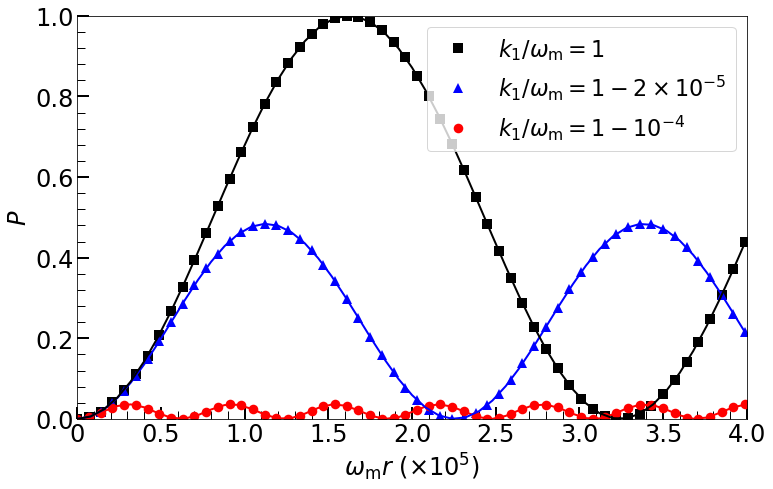

In [38]:
# theory10List = np.genfromtxt ('theory10List.csv', delimiter=",")
# sol10PList = np.genfromtxt ('sol10PList.csv', delimiter=",")

theory1List = np.transpose( np.genfromtxt( 'single-frequency/paper-single-frequency-simple-theory-prob-a1-0.0001-k1-0.9999.csv', delimiter=",") )

theory2List = np.transpose( np.genfromtxt( 'single-frequency/paper-single-frequency-simple-theory-prob-a1-0.0001-k1-0.99998.csv', delimiter=",") )

# theory3List = np.transpose(  np.genfromtxt( 'single-frequency/paper-single-frequency-simple-theory-prob-a1-0.0001-k1-0.99999.csv', delimiter=",") )

theory4List = np.transpose( np.genfromtxt( 'single-frequency/paper-single-frequency-simple-theory-prob-a1-0.0001-k1-1.csv', delimiter=",") )


sol1List = np.transpose(  np.genfromtxt( 'single-frequency/paper-single-frequency-simple-a1-0.0001-k1-0.9999.csv', delimiter=",") )

sol2List = np.transpose( np.genfromtxt( 'single-frequency/paper-single-frequency-simple-a1-0.0001-k1-0.99998.csv', delimiter=",") )

# sol3List = np.transpose( np.genfromtxt( 'single-frequency/paper-single-frequency-simple-a1-0.0001-k1-0.99999.csv', delimiter=",") )

sol4List = np.transpose( np.genfromtxt( 'single-frequency/paper-single-frequency-simple-a1-0.0001-k1-1.csv', delimiter=",") )


# theory1ListFail = np.transpose( np.genfromtxt( 'single-frequency/rabi-formula-fail/paper-single-frequency-simple-theory-prob-a1-0.005-k1-0.5.csv', delimiter=",") )
# sol1ListFail = np.transpose(  np.genfromtxt( 'single-frequency/rabi-formula-fail/paper-single-frequency-simple-a1-0.005-k1-0.5.csv', delimiter=",") )



singleFrequencyplt, singleFrequencyax = plt.subplots()

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

sfps = 7
singleFrequencyplt = plt.plot(
    sol4List[0][0::sfps],sol4List[1][0::sfps],'ks',\
    sol2List[0][0::sfps],sol2List[1][0::sfps],'b^', sol1List[0][0::sfps],sol1List[1][0::sfps],'ro', \
                              theory1List[0],theory1List[1],'r-', theory2List[0],theory2List[1],'b-',\
#                              theory3List[0],theory3List[1],'m:',sol3List[0][0::sfps],sol3List[1][0::sfps],'m^',\
                              theory4List[0],theory4List[1],'k-',\
                              markersize=ftsz*0.4, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('$\omega_{\mathrm{m}}r$ ($\\times10^5$)', fontsize=ftsz)
# plt.ylabel(r'$P_{\nu_\mathrm{L}\to\nu_\mathrm{H}}$', fontsize=ftsz)
plt.ylabel(r'$P$', fontsize=ftsz)
plt.ylim([0,1.0])
plt.xlim([0,400000])
#plt.xlim([0,375000])
plt.legend([r'$k_1/\omega_\mathrm{m}=1$', r'$k_1/\omega_\mathrm{m}=1-2\times 10^{-5}$', r'$k_1/\omega_\mathrm{m}=1-10^{-4}$'], fontsize=ftsz*0.93,frameon=True,loc=1)

singleFrequencyax.tick_params('both', direction='in', length=12, width=2, which='major', labelsize=ftsz, top=False, right=False)
singleFrequencyax.tick_params('both', direction='in', length=8, width=1, which='minor', labelsize=ftsz, top=False, right=False)

singleFrequencymajorLocator = MultipleLocator(50000)
singleFrequencymajorFormatter = FormatStrFormatter('%d')
singleFrequencyminorLocator = MultipleLocator(10000)

singleFrequencymajorLocatory = MultipleLocator(0.2)
singleFrequencymajorFormattery = FormatStrFormatter('%0.1f')
singleFrequencyminorLocatory = MultipleLocator(0.04)


singleFrequencyax.xaxis.set_major_locator(singleFrequencymajorLocator)
singleFrequencyax.xaxis.set_major_formatter(singleFrequencymajorFormatter)

singleFrequencyax.yaxis.set_major_locator(singleFrequencymajorLocatory)
singleFrequencyax.yaxis.set_major_formatter(singleFrequencymajorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
singleFrequencyxlabels = ['', '0','0.5','1.0','1.5','2.0', '2.5', '3.0', '3.5', '4.0']
singleFrequencyax.set_xticklabels(singleFrequencyxlabels)

# for the minor ticks, use no labels; default NullFormatter
singleFrequencyax.xaxis.set_minor_locator(singleFrequencyminorLocator)
singleFrequencyax.yaxis.set_minor_locator(singleFrequencyminorLocatory)

plt.savefig('plots-pub/rabiOscillationsNeutrinoCoincidence-single-frequency.pdf',bbox_inches='tight')

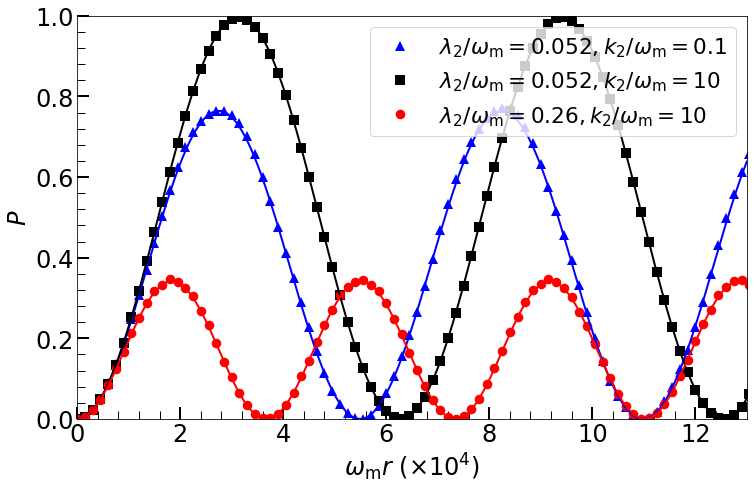

In [39]:
papersol1=np.transpose( np.genfromtxt('interference/paper-interference-a1-a2-0.0001-0.01-k1-k2-1.-0.1.csv', delimiter=",") )
papersol2=np.transpose( np.genfromtxt('interference/paper-interference-a1-a2-0.0001-0.01-k1-k2-1.-10..csv', delimiter=",") )
papersol3=np.transpose( np.genfromtxt('interference/paper-interference-a1-a2-0.0001-0.05-k1-k2-1.-0.1.csv', delimiter=",") )
papersol4=np.transpose( np.genfromtxt('interference/paper-interference-a1-a2-0.0001-0.05-k1-k2-1.-10..csv', delimiter=",") )
# papersolgridlines=np.genfromtxt('interference/paper-interference-theory-amplitude-20170318.csv', delimiter=",")[:4]


interference, interferenceax = plt.subplots()

dashes1 = [5,2,10,5] # 5 points on, 2 off, 3 on, 1 off

# interferenceplt = plt.plot(sol10[0][0::5],sol10[1][0::5],'ko',\
#                          theory10[0],theory10[1],'k-', \
#                          sol11[0][0::5],sol11[1][0::5],'r^',\
#                          theory11[0],theory11[1],'r:', \
#                          sol12[0][0::5],sol12[1][0::5],'bv',\
#                          theory12[0], theory12[1],'b--',\
#                          sol15Crit[0][0::5],sol15Crit[1][0::5],'gD',\
#                          theory15Crit[0], theory15Crit[1],'g-.',\
#                          markersize=ftsz*0.3, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

x_lim_max = 130000
inter_x = np.linspace(0, x_lim_max, x_lim_max )
inter_ak1= [1e-4, 1, 1e-2, 0.1]
inter_ak2= [1e-4, 1, 1e-2, 10]
inter_ak3= [1e-4, 1, 5*1e-2, 0.1]
inter_ak4= [1e-4, 1, 5*1e-2, 10]

inter_seg = 15

interferenceplt = plt.plot(\
                           papersol1[0][0::inter_seg],papersol1[1][0::inter_seg],'b^',\
                           papersol2[0][0::inter_seg],papersol2[1][0::inter_seg],'ks', \
#                          papersol3[0][0::5],papersol3[1][0::5],'k-',\
                           papersol4[0][0::inter_seg], papersol4[1][0::inter_seg],'ro', \
#                          sol12[0][0::5],sol12[1][0::5],'bv',\
#                          theory12[0], theory12[1],'b--',\
#                          sol15Crit[0][0::5],sol15Crit[1][0::5],'g^',\
#                          theory15Crit[0], theory15Crit[1],'g-.',\
                         inter_x, RabiFormula2( inter_ak1[0], inter_ak1[1], inter_ak1[2], inter_ak1[3] , inter_x), 'b-',\
                         inter_x, RabiFormula2( inter_ak2[0], inter_ak2[1], inter_ak2[2], inter_ak2[3] , inter_x), 'k-',\
                         inter_x, RabiFormula2( inter_ak4[0], inter_ak4[1], inter_ak4[2], inter_ak4[3] , inter_x), 'r-',\
                         markersize=ftsz*0.4, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)

plt.xlabel('$\omega_{\mathrm{m}}r$ ($\\times 10^4$)', fontsize=ftsz)
# plt.ylabel(r'$P_{\nu_\mathrm{L}\to\nu_\mathrm{H}}$', fontsize=ftsz)
plt.ylabel(r'$P$', fontsize=ftsz)
plt.ylim([0,1.0])
#plt.xlim([0,380000])
plt.xlim([0,130000])
#plt.legend(['Rabi Formula for $\lambda_2-\lambda_1=0.09\lambda_0$','Numerical Solution for $\lambda_2-\lambda_1=0.09\lambda_0$'], fontsize=ftsz,frameon='rc',loc=1)
# plt.legend([r'$(10^{-2}\omega_{\mathrm{m}},10^{-1}\omega_{\mathrm{m}})$', r'$(10^{-2}\omega_{\mathrm{m}}, 10\omega_{\mathrm{m}})$', r'$(5.0\times 10^{-2}\omega_{\mathrm{m}}$, $10\omega_{\mathrm{m}})$'],fontsize=ftsz-4,frameon=False, bbox_to_anchor=(0., 0.98, 1., .102), loc=3, ncol=3, mode="expand", handletextpad=0.05)
plt.legend([r'$\lambda_2/\omega_\mathrm{m} = 0.052, k_2/\omega_\mathrm{m} =0.1$', r'$\lambda_2/\omega_\mathrm{m} = 0.052, k_2/\omega_\mathrm{m} =10$', r'$\lambda_2/\omega_\mathrm{m} = 0.26, k_2/\omega_\mathrm{m} =10$'],fontsize=ftsz*0.9,frameon=True,loc=1)


#interferenceax.ticklabel_format(axis='x', style='sci', scilimits=(-2,1))

interferenceax.tick_params('both', direction='in', length=12, width=2, which='major', labelsize=ftsz, top=False, right=False)
interferenceax.tick_params('both', direction='in', length=8, width=1, which='minor', labelsize=ftsz, top=False, right=False)

interferencemajorLocator = MultipleLocator(20000)
interferencemajorFormatter = FormatStrFormatter('%.2e')
interferenceminorLocator = MultipleLocator(4000)

interferencemajorLocatory = MultipleLocator(0.2)
interferencemajorFormattery = FormatStrFormatter('%0.1f')
interferenceminorLocatory = MultipleLocator(0.04)


interferenceax.xaxis.set_major_locator(interferencemajorLocator)
interferenceax.xaxis.set_major_formatter(interferencemajorFormatter)

interferenceax.yaxis.set_major_locator(interferencemajorLocatory)
interferenceax.yaxis.set_major_formatter(interferencemajorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
interferencexlabels = ['', '0','2','4','6', '8','10','12']
interferenceax.set_xticklabels(interferencexlabels)

# for the minor ticks, use no labels; default NullFormatter
interferenceax.xaxis.set_minor_locator(interferenceminorLocator)
interferenceax.yaxis.set_minor_locator(interferenceminorLocatory)


# interferenceax.axhline(papersolgridlines[0], linestyle=':', color='b')
# interferenceax.axhline(papersolgridlines[1], linestyle='--', color='r')
# interferenceax.axhline(papersolgridlines[2], linestyle='-', color='k')
# interferenceax.axhline(papersolgridlines[3], linestyle='-.', color='k')


plt.savefig('plots-pub/interference-reduction-slide-with-legend.pdf',bbox_inches='tight')

## Higher Orders in Interferences

In [41]:
%%bash
ls interference-higher-order

first2modes-a1-1e-4-k1-1-a2-0.032-k2-0.1.csv
first2modes-a1-1e-4-k1-1-a2-0.1-k2-10.csv
first3modes-a1-1e-4-k1-1-a2-0.032-k2-0.1.csv
first3modes-a1-1e-4-k1-1-a2-0.1-k2-10.csv
full-a1-1e-4-k1-1-a2-0.032-k2-0.1.csv
full-a1-1e-4-k1-1-a2-0.1-k2-10.csv
interference-data-12-07-09.zip
rabi-one-a1-1e-4-k1-1-a2-0.032-k2-0.1.csv
rabi-one-a1-1e-4-k1-1-a2-0.1-k2-10.csv
theory2-a1-1e-4-k1-1-a2-0.032-k2-0.1.csv
theory2-a1-1e-4-k1-1-a2-0.1-k2-10.csv
theory3-a1-1e-4-k1-1-a2-0.032-k2-0.1.csv
theory3-a1-1e-4-k1-1-a2-0.1-k2-10.csv


In [42]:
first2modesho1 = np.transpose(  np.genfromtxt( 'interference-higher-order/first2modes-a1-1e-4-k1-1-a2-0.032-k2-0.1.csv', delimiter=",") )
first2modesho2 = np.transpose(  np.genfromtxt( 'interference-higher-order/first2modes-a1-1e-4-k1-1-a2-0.1-k2-10.csv', delimiter=",") )

fullho1 = np.transpose(  np.genfromtxt( 'interference-higher-order/full-a1-1e-4-k1-1-a2-0.032-k2-0.1.csv', delimiter=",") )
fullho2 = np.transpose(  np.genfromtxt( 'interference-higher-order/full-a1-1e-4-k1-1-a2-0.1-k2-10.csv', delimiter=",") )

theory0ho1 = np.transpose(  np.genfromtxt( 'interference-higher-order/rabi-one-a1-1e-4-k1-1-a2-0.032-k2-0.1.csv', delimiter=",") )
theory0ho2 = np.transpose(  np.genfromtxt( 'interference-higher-order/rabi-one-a1-1e-4-k1-1-a2-0.1-k2-10.csv', delimiter=",") )

theoryho1 = np.transpose(  np.genfromtxt( 'interference-higher-order/theory3-a1-1e-4-k1-1-a2-0.032-k2-0.1.csv', delimiter=",") )
theoryho2 = np.transpose(  np.genfromtxt( 'interference-higher-order/theory3-a1-1e-4-k1-1-a2-0.1-k2-10.csv', delimiter=",") )

theory2ho1 = np.transpose(  np.genfromtxt( 'interference-higher-order/theory2-a1-1e-4-k1-1-a2-0.032-k2-0.1.csv', delimiter=",") )
theory2ho2 = np.transpose(  np.genfromtxt( 'interference-higher-order/theory2-a1-1e-4-k1-1-a2-0.1-k2-10.csv', delimiter=",") )

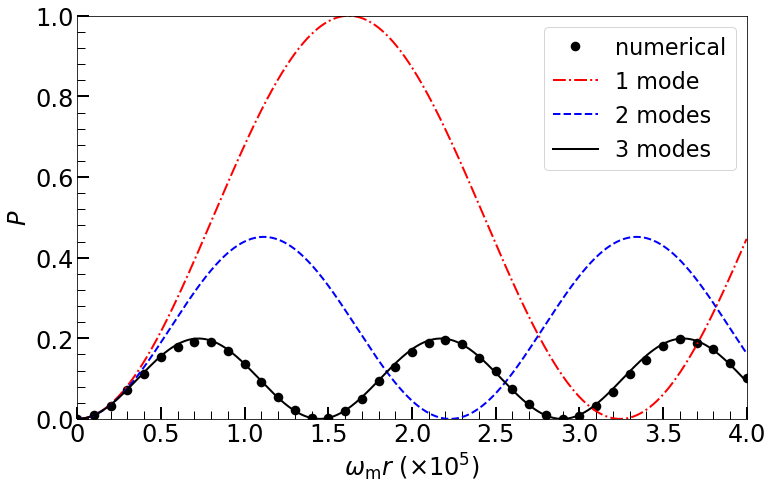

In [43]:
hoplt, hoax = plt.subplots()

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

sfps = 100
hoplt = plt.plot(
    fullho1[0][0::sfps],fullho1[1][0::sfps],'ko',\
#     fullho2[0][0::sfps],fullho2[1][0::sfps],'ks',\
#     first2modesho1[0][0::sfps],first2modesho1[1][0::sfps],'r^', \
    theory0ho1[0][0::],theory0ho1[1][0::],'r-.', \
#     first2modesho2[0][0::sfps],first2modesho2[1][0::sfps],'r^',\
    theory2ho1[0][0::],theory2ho1[1][0::],'b--', \
    theoryho1[0][0::],theoryho1[1][0::],'k-', \
#     theoryho2[0][0::],theoryho2[1][0::],'k-', \

#     theory2ho2[0][0::],theory2ho2[1][0::],'r--', \
    markersize=ftsz*0.4, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('$\omega_{\mathrm{m}}r$ ($\\times10^5$)', fontsize=ftsz)
# plt.ylabel(r'$P_{\nu_\mathrm{L}\to\nu_\mathrm{H}}$', fontsize=ftsz)
plt.ylabel(r'$P$', fontsize=ftsz)
plt.ylim([0,1.0])
plt.xlim([0,400000])
# plt.legend([r'$\lambda_2/\omega_\mathrm{m}=0.032, k_2/\omega_\mathrm{m}=0.1$',  '', r'$\lambda_2/\omega_\mathrm{m}=0.1, k_2/\omega_\mathrm{m}=10$'], fontsize=ftsz*0.93,frameon=True,loc=1)
plt.legend(['numerical','1 mode', '2 modes', '3 modes'], fontsize=ftsz*0.93,frameon=True,loc=1)

hoax.tick_params('both', direction='in', length=12, width=2, which='major', labelsize=ftsz, top=False, right=False)
hoax.tick_params('both', direction='in', length=8, width=1, which='minor', labelsize=ftsz, top=False, right=False)

homajorLocator = MultipleLocator(50000)
homajorFormatter = FormatStrFormatter('%d')
hominorLocator = MultipleLocator(10000)

homajorLocatory = MultipleLocator(0.2)
homajorFormattery = FormatStrFormatter('%0.1f')
hominorLocatory = MultipleLocator(0.04)


hoax.xaxis.set_major_locator(homajorLocator)
hoax.xaxis.set_major_formatter(homajorFormatter)

hoax.yaxis.set_major_locator(homajorLocatory)
hoax.yaxis.set_major_formatter(homajorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
hoxlabels = ['', '0','0.5','1.0','1.5','2.0', '2.5', '3.0', '3.5', '4.0']
hoax.set_xticklabels(hoxlabels)

# for the minor ticks, use no labels; default NullFormatter
hoax.xaxis.set_minor_locator(hominorLocator)
hoax.yaxis.set_minor_locator(hominorLocatory)

plt.savefig('plots-pub/rabiOscillationsNeutrino-higher-orders-long-wavelength.pdf',bbox_inches='tight')

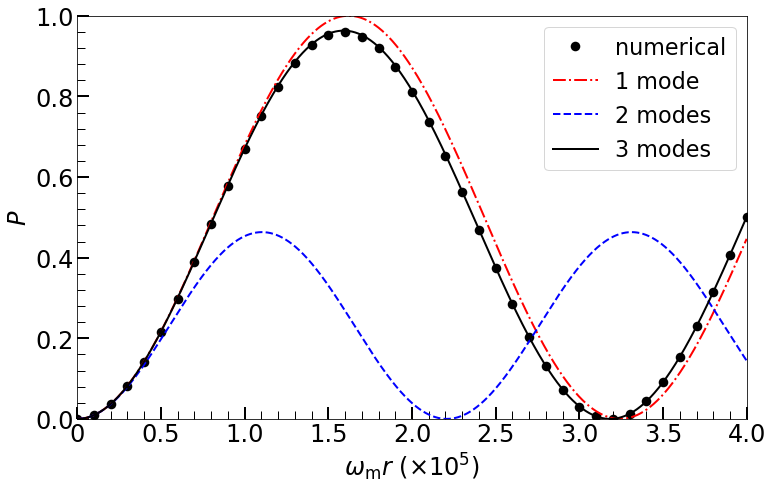

In [44]:
hoplt, hoax = plt.subplots()

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

sfps = 100
hoplt = plt.plot(
    fullho2[0][0::sfps],fullho2[1][0::sfps],'ko',\
    theory0ho2[0][0::],theory0ho2[1][0::],'r-.',\
    theory2ho2[0][0::],theory2ho2[1][0::],'b--', \
    theoryho2[0][0::],theoryho2[1][0::],'k-', \
    markersize=ftsz*0.4, linewidth=2, fillstyle='full', markeredgecolor='red', markeredgewidth=0.0)
plt.xlabel('$\omega_{\mathrm{m}}r$ ($\\times10^5$)', fontsize=ftsz)
# plt.ylabel(r'$P_{\nu_\mathrm{L}\to\nu_\mathrm{H}}$', fontsize=ftsz)
plt.ylabel(r'$P$', fontsize=ftsz)
plt.ylim([0,1.0])
plt.xlim([0,400000])
# plt.legend([r'$\lambda_2/\omega_\mathrm{m}=0.032, k_2/\omega_\mathrm{m}=0.1$',  '', r'$\lambda_2/\omega_\mathrm{m}=0.1, k_2/\omega_\mathrm{m}=10$'], fontsize=ftsz*0.93,frameon=True,loc=1)
plt.legend(['numerical','1 mode', '2 modes', '3 modes'], fontsize=ftsz*0.93,frameon=True,loc=1)

hoax.tick_params('both', direction='in', length=12, width=2, which='major', labelsize=ftsz, top=False, right=False)
hoax.tick_params('both', direction='in', length=8, width=1, which='minor', labelsize=ftsz, top=False, right=False)

homajorLocator = MultipleLocator(50000)
homajorFormatter = FormatStrFormatter('%d')
hominorLocator = MultipleLocator(10000)

homajorLocatory = MultipleLocator(0.2)
homajorFormattery = FormatStrFormatter('%0.1f')
hominorLocatory = MultipleLocator(0.04)


hoax.xaxis.set_major_locator(homajorLocator)
hoax.xaxis.set_major_formatter(homajorFormatter)

hoax.yaxis.set_major_locator(homajorLocatory)
hoax.yaxis.set_major_formatter(homajorFormattery)

# xlabels = [item.get_text() for item in interferenceax.get_xticklabels()]
hoxlabels = ['', '0','0.5','1.0','1.5','2.0', '2.5', '3.0', '3.5', '4.0']
hoax.set_xticklabels(hoxlabels)

# for the minor ticks, use no labels; default NullFormatter
hoax.xaxis.set_minor_locator(hominorLocator)
hoax.yaxis.set_minor_locator(hominorLocatory)

plt.savefig('plots-pub/rabiOscillationsNeutrino-higher-orders-short-wavelength.pdf',bbox_inches='tight')

## Constructive Effects

In [31]:

# papersol1=np.transpose( np.genfromtxt('constructive/paper-interference-constructive-a1-a2-0.0001-0.-k1-k2-0.9999-0..csv', delimiter=",") )
# papersol2=np.transpose( np.genfromtxt('constructive/paper-interference-constructive-a1-a2-0.0001-0.02-k1-k2-0.9999-3..csv', delimiter=",") )
# papertheory1=np.transpose( np.genfromtxt('constructive/paper-interference-constructive-theory-a1-a2-0.0001-0.-k1-k2-0.9999-0..csv', delimiter=",") )
# papertheory2=np.transpose( np.genfromtxt('constructive/paper-interference-constructive-theory-a1-a2-0.0001-0.02-k1-k2-0.9999-3..csv', delimiter=",") )


# interference, interferenceax = plt.subplots()

# dashes1 = [5,2,10,5] # 5 points on, 2 off, 3 on, 1 off

# x_lim_max = 1e5
# inter_x = np.linspace(0, x_lim_max, x_lim_max )
# inter_ak1= [1e-4, 1-1e-4]


# inter_seg = 150

# papertheory1_rabi = RabiFormula( inter_ak1[0], inter_ak1[1], papertheory1[0][0::])
# papertheory1_rabi_full = [papertheory1[0][0::], papertheory1_rabi]

# interferenceplt = plt.plot(\
#                            papersol1[0][0::inter_seg],papersol1[1][0::inter_seg],'ro',\
#                            zorder=-1, markersize=ftsz*0.4, linewidth=2, fillstyle='full',  markeredgewidth=0.0)
# interferenceplt = plt.plot(papersol2[0][0::inter_seg],papersol2[1][0::inter_seg],'ks', \
#                            zorder=-2, markersize=ftsz*0.4, linewidth=2, fillstyle='full',  markeredgewidth=0.0)

# plt.plot(papertheory2[0][0::], papertheory2[1][0::],'k-', zorder=-10, linewidth=3)
# plt.plot(papertheory1[0][0::], papertheory1_rabi,'r-', zorder=-20, linewidth=3)


# plt.xlabel('$\omega_{\mathrm{m}}r$ ($\\times 10^4$)', fontsize=ftsz)
# plt.ylabel(r'$P$', fontsize=ftsz)
# plt.ylim([0,1.0])
# plt.xlim([0,x_lim_max])


# interferenceax.tick_params('both', direction='in', length=12, width=2, which='major', labelsize=ftsz, top=False, right=False)
# interferenceax.tick_params('both', direction='in', length=8, width=1, which='minor', labelsize=ftsz, top=False, right=False)

# interferencemajorLocator = MultipleLocator(20000)
# interferencemajorFormatter = FormatStrFormatter('%.2e')
# interferenceminorLocator = MultipleLocator(4000)

# interferencemajorLocatory = MultipleLocator(0.2)
# interferencemajorFormattery = FormatStrFormatter('%0.1f')
# interferenceminorLocatory = MultipleLocator(0.04)


# interferenceax.xaxis.set_major_locator(interferencemajorLocator)
# interferenceax.xaxis.set_major_formatter(interferencemajorFormatter)

# interferenceax.yaxis.set_major_locator(interferencemajorLocatory)
# interferenceax.yaxis.set_major_formatter(interferencemajorFormattery)


# interferencexlabels = ['', '0','2','4','6', '8','10']
# interferenceax.set_xticklabels(interferencexlabels)


# interferenceax.xaxis.set_minor_locator(interferenceminorLocator)
# interferenceax.yaxis.set_minor_locator(interferenceminorLocatory)


# plt.legend([r'$\lambda_2/\omega_{\mathrm{m}}=0$', r'$\lambda_2/\omega_{\mathrm{m}}=0.1$'],fontsize=ftsz*0.9,frameon=True,loc=1)


# plt.savefig('plots-pub/interference-enhance-slide-with-legend.pdf',bbox_inches='tight')

Dump data

In [90]:
# np.savetxt('constructive/paper-interference-constructive-theory-a1-a2-0.0001-0.-k1-k2-0.9999-0..csv', np.transpose(papertheory1_rabi_full), delimiter=',')

In [27]:
# np.genfromtxt('constructive/paper-interference-constructive-theory-a1-a2-0.0001-0.-k1-k2-0.9999-0..csv', delimiter=",")